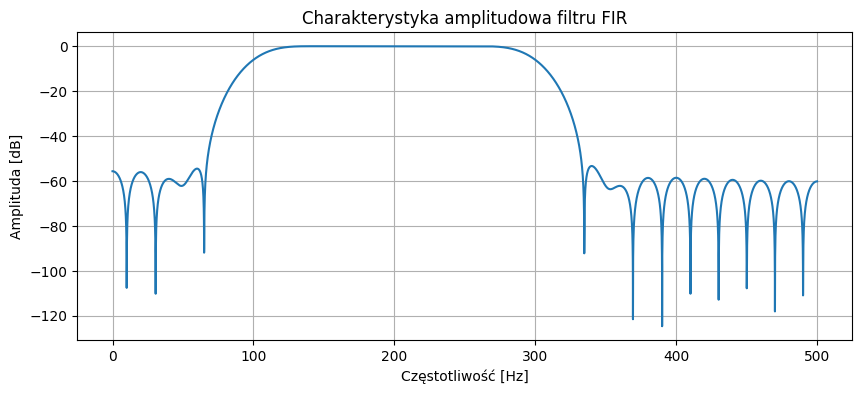

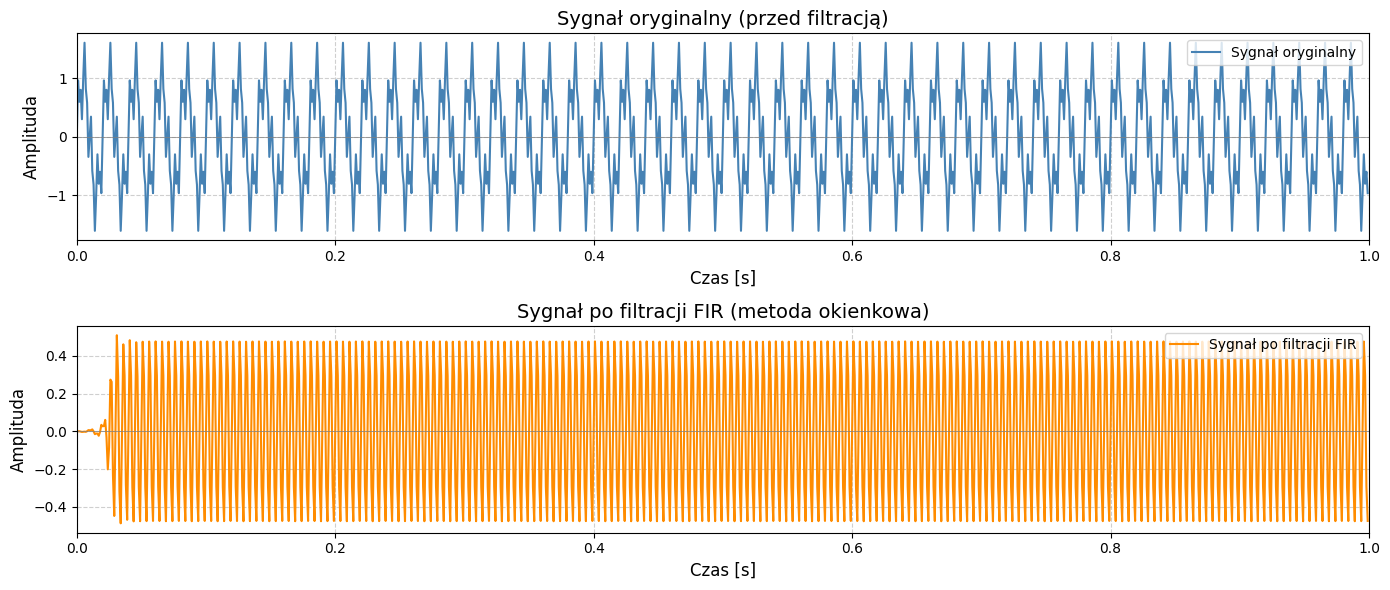

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz, lfilter

# Parametry filtru
fs = 1000  # częstotliwość próbkowania w Hz
numtaps = 51  # rząd filtru (liczba współczynników)
cutoff = [100, 300]  # pasmo przepustowe (dla filtru pasmowoprzepustowego)

# Wybór okna (dostępne: 'boxcar', 'hamming', 'hann', 'blackman')
window_type = 'hamming'

# Projektowanie filtru FIR metodą okienkową
fir_coeff = firwin(numtaps, cutoff, window=window_type, pass_zero=False, fs=fs)

# Charakterystyka amplitudowa filtru
w, h = freqz(fir_coeff, worN=8000, fs=fs)
plt.figure(figsize=(10, 4))
plt.plot(w, 20 * np.log10(np.abs(h)))
plt.title('Charakterystyka amplitudowa filtru FIR')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.grid()
plt.show()

# Generowanie sygnału testowego (mieszanka sinusów)
t = np.arange(0, 1.0, 1/fs)
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t) + 0.3 * np.sin(2 * np.pi * 400 * t)

# Filtracja sygnału
y = lfilter(fir_coeff, 1.0, x)

# Wizualizacja sygnału przed i po filtracji
plt.figure(figsize=(14, 6))

# Sygnał oryginalny
plt.subplot(2, 1, 1)
plt.plot(t, x, label='Sygnał oryginalny', color='steelblue')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Sygnał oryginalny (przed filtracją)', fontsize=14)
plt.xlabel('Czas [s]', fontsize=12)
plt.ylabel('Amplituda', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.xlim(0, 1)

# Sygnał po filtracji
plt.subplot(2, 1, 2)
plt.plot(t, y, label='Sygnał po filtracji FIR', color='darkorange')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Sygnał po filtracji FIR (metoda okienkowa)', fontsize=14)
plt.xlabel('Czas [s]', fontsize=12)
plt.ylabel('Amplituda', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()